In [1]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [2]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style> div.input {display:none;} </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')

display(tag)

## Complex numbers in Cartesian form

Feel free to use this interactive example to visualize complex numbers in a complex plane, utilizing the Cartesian form. Also, you can test basic mathematical operators while working with complex numbers: addition, subtraction, multiplying, and dividing. All results are presented in the respective plot, as well as in the typical mathematical notation.

You can manipulate complex numbers directly on the plot (by simple clicking), or/and use input fields at the same time. In order to provide better visibility of the respective vectors in the plot widget, the complex number coefficients are limited to $\pm10$.

<IPython.core.display.Javascript object>


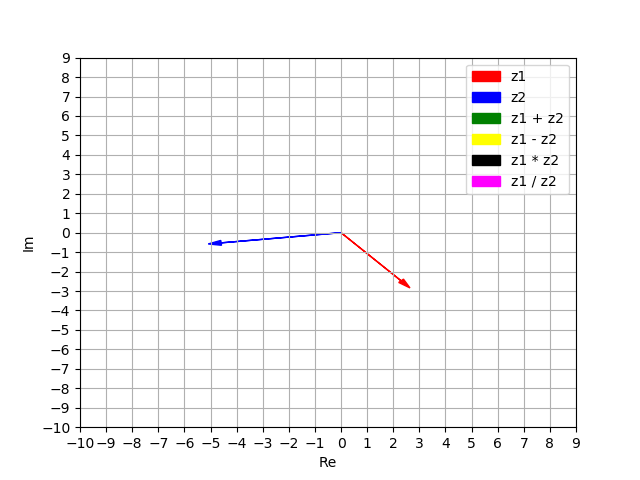

Box(children=(Label(value='z1 = '), BoundedFloatText(value=0.0, layout=Layout(width='10%'), max=10.0, min=-10.…

Box(children=(Label(value='z2 = '), BoundedFloatText(value=0.0, layout=Layout(width='10%'), max=10.0, min=-10.…

Complex number operations:


Box(children=(Button(description='Add', style=ButtonStyle()), Button(description='Subtract', style=ButtonStyle…

Output()

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import ipywidgets as widgets
from IPython.display import display

red_patch = mpatches.Patch(color='red', label='z1')
blue_patch = mpatches.Patch(color='blue', label='z2')
green_patch = mpatches.Patch(color='green', label='z1 + z2')
yellow_patch = mpatches.Patch(color='yellow', label='z1 - z2')
black_patch = mpatches.Patch(color='black', label='z1 * z2')
magenta_patch = mpatches.Patch(color='magenta', label='z1 / z2')

# Init values

XLIM = 5
YLIM = 5
vectors_index_first = False;
V = [None, None]
V_complex = [None, None]

# Complex plane

fig = plt.figure(num='Complex numbers in Cartesian form')
ax = fig.add_subplot(1, 1, 1)

def get_interval(lim):
    if lim <= 10:
        return 1
    if lim < 75:
        return 5
    if lim > 100:
        return 25
    return 10
    
def set_ticks():
   
    XLIMc = int((XLIM / 10) + 1) * 10
    YLIMc = int((YLIM / 10) + 1) * 10
        
    if XLIMc > 150:
        XLIMc += 10
    if YLIMc > 150:
        YLIMc += 10
    
    xstep = get_interval(XLIMc)
    ystep = get_interval(YLIMc)
    
    
    #print(stepx, stepy)
    major_ticks = np.arange(-XLIMc, XLIMc, xstep)
    major_ticks_y = np.arange(-YLIMc, YLIMc, ystep)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks_y)
    ax.grid(which='both')

def clear_plot():
    plt.cla()
    set_ticks()
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch, magenta_patch])

clear_plot()
set_ticks()
plt.show()
set_ticks()

# Set a complex number using direct manipulation on the plot 
def set_vector(i, data_x, data_y):
    clear_plot()
    V.pop(i)
    V.insert(i, (0, 0, round(data_x, 2), round(data_y, 2)))
    V_complex.pop(i)
    V_complex.insert(i, complex(round(data_x, 2), round(data_y, 2)))
    if i == 0:
        ax.arrow(*V[0], head_width=0.25, head_length=0.5, color="r", length_includes_head=True)
        a1.value = round(data_x, 2)
        b1.value =  round(data_y, 2)
        if V[1] != None:
            ax.arrow(*V[1], head_width=0.25, head_length=0.5, color="b", length_includes_head=True)
    elif i == 1:
        ax.arrow(*V[1], head_width=0.25, head_length=0.5, color="b", length_includes_head=True) 
        a2.value = round(data_x, 2)
        b2.value =  round(data_y, 2)
        if V[0] != None:
            ax.arrow(*V[0], head_width=0.25, head_length=0.5, color="r", length_includes_head=True)
    max_bound()
        
    
def onclick(event):
    global vectors_index_first
    vectors_index_first = not vectors_index_first
    x = event.xdata
    y = event.ydata
    if (x > 10):
        x = 10.0
    if (x < - 10):
        x = -10.0
    
    if (y > 10):
        y = 10.0
        
    if (y < - 10):
        y = -10.0
        
    if vectors_index_first:      
        set_vector(0, x, y)
    else:
        set_vector(1, x, y)
        
fig.canvas.mpl_connect('button_press_event', onclick)

    
# Widgets
a1 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
b1 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
button_set_z1 = widgets.Button(description="Plot z1")

a2 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
b2 = widgets.BoundedFloatText(layout=widgets.Layout(width='10%'), min = -10, max = 10, step = 0.5)
button_set_z2 = widgets.Button(description="Plot z2")

box_layout_z1 = widgets.Layout(border='solid red', padding='10px')
box_layout_z2 = widgets.Layout(border='solid blue', padding='10px')
box_layout_opers = widgets.Layout(border='solid black', padding='10px')

items_z1 = [widgets.Label("z1 = "), a1, widgets.Label("+ j * "), b1, button_set_z1]
items_z2 = [widgets.Label("z2 = "), a2, widgets.Label("+ j * "), b2, button_set_z2]
display(widgets.Box(children=items_z1, layout=box_layout_z1))
display(widgets.Box(children=items_z2, layout=box_layout_z2))

button_add = widgets.Button(description="Add")
button_substract = widgets.Button(description="Subtract")
button_multiply = widgets.Button(description="Multiply")
button_divide = widgets.Button(description="Divide")
button_reset = widgets.Button(description="Reset")
output = widgets.Output()

print('Complex number operations:')
items_operations = [button_add, button_substract, button_multiply, button_divide, button_reset]
display(widgets.Box(children=items_operations))
display(output)

# Set complex number using input widgets (Text and Button)
def on_button_set_z1_clicked(b):
    z1_old = V[0];
    z1_new = (0, 0, a1.value, b1.value)
    if z1_old != z1_new:
        set_vector(0, a1.value, b1.value)
    change_lims()
    
def on_button_set_z2_clicked(b):
    z2_old = V[1];
    z2_new = (0, 0, a2.value, b2.value)
    if z2_old != z2_new:
        set_vector(1, a2.value, b2.value)
    change_lims()   

# Complex number operations:
def perform_operation(oper):
    global XLIM, YLIM
    if (V_complex[0] != None) and (V_complex[1] != None):
        if (oper == '+'):
            result = V_complex[0] + V_complex[1]
            v_color = "g"
        elif (oper == '-'):
            result = V_complex[0] - V_complex[1]
            v_color = "y"
        elif (oper == '*'):
            result = V_complex[0] * V_complex[1]
            v_color = "black"
        elif (oper == '/'):
            result = V_complex[0] / V_complex[1]
            v_color = "magenta"
        result = complex(round(result.real, 2), round(result.imag, 2))
        ax.arrow(0, 0, result.real, result.imag, head_width=0.25, head_length=0.5, color=v_color, length_includes_head=True)
        
        if abs(result.real) > XLIM:
            XLIM = round(abs(result.real) + 1)
        if abs(result.imag) > YLIM:
            YLIM = round(abs(result.imag) + 1)
        change_lims()
        
        with output:
            print(V_complex[0], oper, V_complex[1], "=", result)
        
    
def on_button_add_clicked(b):
    perform_operation("+")
                  
def on_button_substract_clicked(b):
    perform_operation("-")

def on_button_multiply_clicked(b):
    perform_operation("*")

def on_button_divide_clicked(b):
    perform_operation("/")
          
        
# Plot init methods        
def on_button_reset_clicked(b):
    global V, V_complex, XLIM, YLIM
    with output:
        output.clear_output()
        clear_plot()
        vectors_index_first = False;
        V = [None, None]
        V_complex = [None, None]
        a1.value = 0
        b1.value = 0
        a2.value = 0
        b2.value = 0
        XLIM = 5
        YLIM = 5
        change_lims()
        
def clear_plot():
    plt.cla()
    set_ticks()
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch, magenta_patch])

def change_lims():
    set_ticks()
    plt.ylim([-YLIM, YLIM])
    plt.xlim([-XLIM, XLIM])
    set_ticks()
    
def max_bound():
    global XLIM, YLIM
    mx = 0
    my = 0
    if V_complex[0] != None:
        z = V_complex[0]
        if abs(z.real) > mx:
            mx = abs(z.real)
        if abs(z.imag) > my:
            my = abs(z.imag)
    if V_complex[1] != None:
        z = V_complex[1]
        if abs(z.real) > mx:
            mx = abs(z.real)
        if abs(z.imag) > my:
            my = abs(z.imag)
    if mx > XLIM:
        XLIM = round(mx + 1)
    elif mx <=5:
        XLIM = 5
    if my > YLIM:
        YLIM = round(my + 1)
    elif my <=5:
        YLIM = 5
    change_lims()

# Button events
button_set_z1.on_click(on_button_set_z1_clicked)
button_set_z2.on_click(on_button_set_z2_clicked)
button_add.on_click(on_button_add_clicked)
button_substract.on_click(on_button_substract_clicked)
button_multiply.on_click(on_button_multiply_clicked)
button_divide.on_click(on_button_divide_clicked)
button_reset.on_click(on_button_reset_clicked)
